In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read image

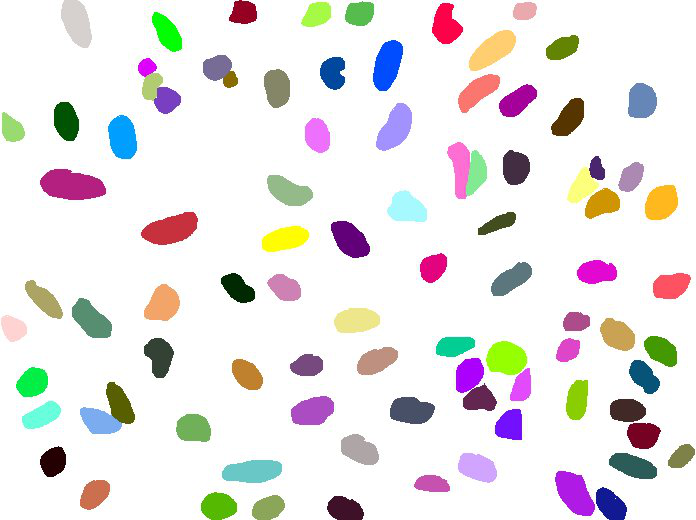

In [45]:
#install Pillow
from PIL import Image, ImageFilter, ImageEnhance

image  = Image.open('Nuclei_Msk.jpg') #read the image
#image.show() --> show the image in another browser
image

#### Contrast

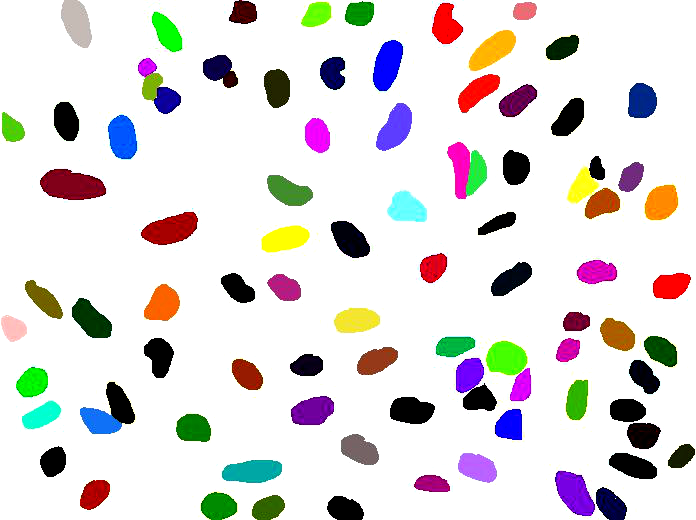

In [46]:
contrast = ImageEnhance.Contrast(image)
contrast.enhance(2) #200% more contrast

#### Sharpness

In [47]:
image_sharp = image.filter(ImageFilter.SHARPEN) #apply a sharpness filter to the image
red,green,blue = image_sharp.split()

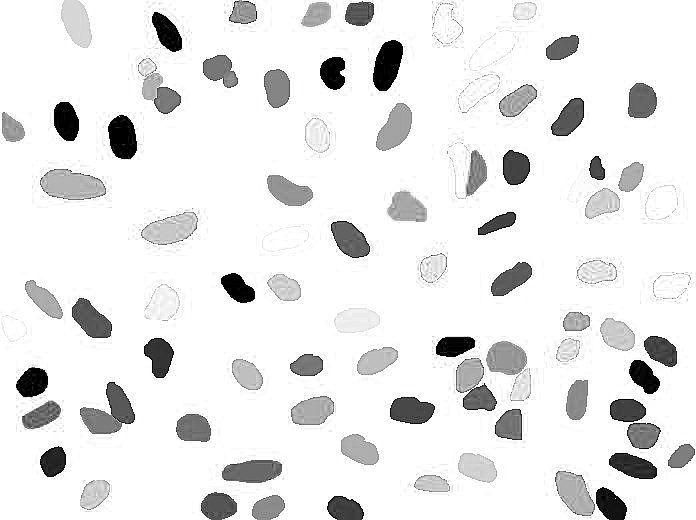

In [48]:
red #the split result based on red

### Read CSV

In [12]:
nuclei = pd.read_csv("Nuclei.csv") #read csv document
nuclei.head() #take a look of first 5 rows

,ImageNumber,ObjectNumber,Intensity_IntegratedIntensityEdge_DAPI,Intensity_IntegratedIntensityEdge_PI,Intensity_IntegratedIntensity_DAPI,Intensity_IntegratedIntensity_PI,Intensity_LowerQuartileIntensity_DAPI,Intensity_LowerQuartileIntensity_PI,Intensity_MADIntensity_DAPI,Intensity_MADIntensity_PI,...,Intensity_MinIntensityEdge_PI,Intensity_MinIntensity_DAPI,Intensity_MinIntensity_PI,Intensity_StdIntensityEdge_DAPI,Intensity_StdIntensityEdge_PI,Intensity_StdIntensity_DAPI,Intensity_StdIntensity_PI,Intensity_UpperQuartileIntensity_DAPI,Intensity_UpperQuartileIntensity_PI,Number_Object_Number
0,1,1,5.066987,4.504585,63.661448,26.980835,0.060006,0.035172,0.019913,0.001007,...,0.031388,0.031815,0.031388,0.005757,0.001566,0.029094,0.001507,0.107881,0.037224,1
1,1,2,4.461616,3.758312,52.943389,20.978958,0.055276,0.033928,0.033433,0.001694,...,0.028016,0.029816,0.027481,0.005620,0.002464,0.036908,0.002593,0.121820,0.037316,2
2,1,3,4.838346,2.810544,31.127337,12.375784,0.064607,0.030098,0.014519,0.000992,...,0.027512,0.038941,0.027512,0.007579,0.001566,0.019099,0.001467,0.092367,0.032090,3
3,1,4,3.235828,3.306371,38.797894,18.318380,0.040070,0.032624,0.028779,0.000977,...,0.028748,0.026749,0.028748,0.003096,0.001483,0.030482,0.001442,0.096674,0.034585,4
4,1,5,3.967391,3.223301,37.443107,15.369772,0.056352,0.032898,0.027031,0.001404,...,0.028244,0.031708,0.028153,0.005773,0.002650,0.030331,0.002118,0.110895,0.035672,5


In [14]:
np.size(nuclei.index) #number of rows

1244

In [16]:
nuclei.columns #name of the columns

Index(['ImageNumber', 'ObjectNumber', 'Intensity_IntegratedIntensityEdge_DAPI',
       'Intensity_IntegratedIntensityEdge_PI',
       'Intensity_IntegratedIntensity_DAPI',
       'Intensity_IntegratedIntensity_PI',
       'Intensity_LowerQuartileIntensity_DAPI',
       'Intensity_LowerQuartileIntensity_PI', 'Intensity_MADIntensity_DAPI',
       'Intensity_MADIntensity_PI', 'Intensity_MassDisplacement_DAPI',
       'Intensity_MassDisplacement_PI', 'Intensity_MaxIntensityEdge_DAPI',
       'Intensity_MaxIntensityEdge_PI', 'Intensity_MaxIntensity_DAPI',
       'Intensity_MaxIntensity_PI', 'Intensity_MeanIntensityEdge_DAPI',
       'Intensity_MeanIntensityEdge_PI', 'Intensity_MeanIntensity_DAPI',
       'Intensity_MeanIntensity_PI', 'Intensity_MedianIntensity_DAPI',
       'Intensity_MedianIntensity_PI', 'Intensity_MinIntensityEdge_DAPI',
       'Intensity_MinIntensityEdge_PI', 'Intensity_MinIntensity_DAPI',
       'Intensity_MinIntensity_PI', 'Intensity_StdIntensityEdge_DAPI',
       'Int

In [79]:
mean_nuclei = nuclei.groupby(['ImageNumber']).mean().T #the average value for each attribute
mean_nuclei = mean_nuclei.iloc[1:31] #drop the non-numeric attributes: objectNumber and Number_object_Number 
mean_nuclei.columns = ['Mean'] #rename the column
mean_nuclei

,Mean
Intensity_IntegratedIntensityEdge_DAPI,5.010761
Intensity_IntegratedIntensityEdge_PI,4.279991
Intensity_IntegratedIntensity_DAPI,59.911794
Intensity_IntegratedIntensity_PI,26.723821
Intensity_LowerQuartileIntensity_DAPI,0.055663
Intensity_LowerQuartileIntensity_PI,0.035176
Intensity_MADIntensity_DAPI,0.031253
Intensity_MADIntensity_PI,0.003959
Intensity_MassDisplacement_DAPI,0.436400
Intensity_MassDisplacement_PI,0.379185


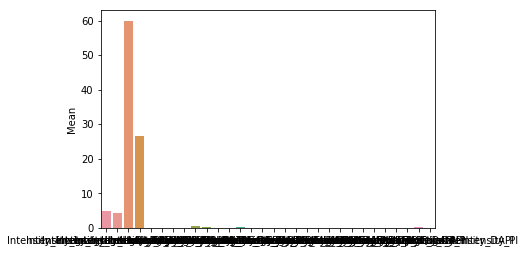

In [223]:
sns.barplot(data = mean_nuclei, x = mean_nuclei.index, y = 'Mean')

From the barplot and dataframe, we can see the scales for every attribute are significant differently. Most are ranged between 0 to 1, only very few attribures ('Intensity_IntegratedIntensityEdge_DAPI', 'Intensity_IntegratedIntensityEdge_PI') are around 5. Two attributes ('Intensity_IntegratedIntensity_DAPI', 'Intensity_IntegratedIntensity_PI') are significantly larger than the rest. <br>
<strong>Therefore, to prepart further analysis, we must apply a normalization on the dataset.  

### Read Excel

In [5]:
fin = pd.read_excel('Financial Sample.xlsx')
fin.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [6]:
np.size(fin.index) #number of rows

700

In [7]:
fin.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [37]:
fin[['Units Sold','Manufacturing Price', 'Sale Price', 'Gross Sales','Discounts',' Sales', 'COGS', 'Profit']].describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000


The summary table showed us the scales of every attribute are different. A normalization step cannot be ignored for further step. 

#### Groupby Time

In [32]:
#the average units sold and profit for each month
fin_time = pd.DataFrame(fin.groupby(['Date'])['Profit'].mean())
fin_time

,Profit
Date,
2013-09-01,21817.229429
2013-10-01,23682.787143
2013-11-01,21871.494286
2013-12-01,19758.973714
2014-01-01,23257.962286
2014-02-01,32815.639714
2014-03-01,19139.053429
2014-04-01,26570.987714
2014-05-01,23675.430286


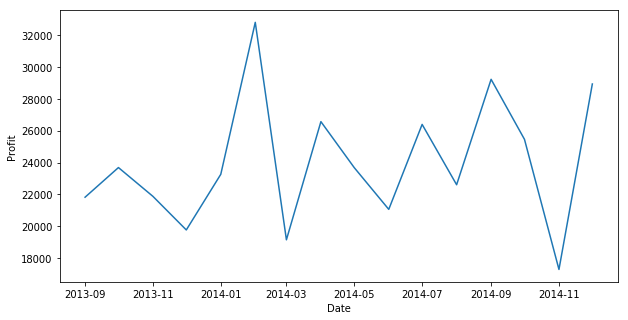

In [33]:
#plot
plt.figure(figsize=(10,5))
sns.lineplot(x = fin_time.index, y = fin_time.Profit)
plt.show()

From the plot, the profit acheived the peak at the beginning of 2014, then sharply dropped to a low point shortly. Then, the profit constantly fluctuated between 2014-Mar to 2014-Sept. The loweast point happend at 2014-Nov. <br> 
The plot didn't show us any significant seasonal trend. <br>
<strong> For further study, I prefer apply a decomposition on the dataset. However, due the tiny size of dataset, it will be hard for us to accomplish time-series analysis. 

### Read Binary

In [39]:
import pyabf
abf = pyabf.ABF('16O03002.abf')
abf.setSweep(5) #set the sweep number as 5

data = abf.sweepY
data_time = abf.sweepX
print('data: ', data)
print('time: ', data_time)

data:  [-61.523438 -61.73706  -61.523438 ... -61.12671  -60.913086 -61.00464 ]
time:  [0.000e+00 1.000e-04 2.000e-04 ... 9.997e-01 9.998e-01 9.999e-01]


In [40]:
data.mean()

-58.44438

In [41]:
print ('The maximum value is %.2f' % data.max())
print ('The minimum value is %.2f' % data.min())

The maximum value is 21.03
The minimum value is -62.41


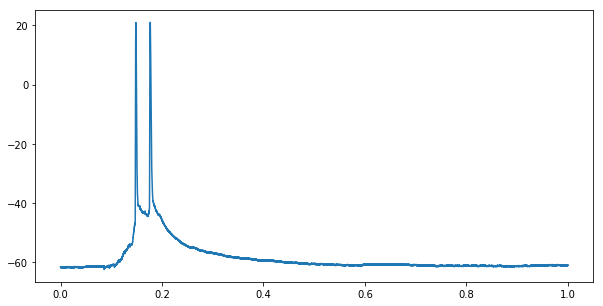

In [43]:
plt.figure(figsize = (10,5))
sns.lineplot(x = data_time, y = data)
plt.show()

There are two peaks, which acheived 20, located on the very beginning. After the second peak, the value dropped sharply, then stayed at roughly -60. 